In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1=pd.read_csv("tmdb_5000_credits.csv")
df1=pd.read_csv("tmdb_5000_movies.csv")
#df1.rename(columns={"movie_id":"id"},inplace=True)
df1

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [3]:
a=df1["popularity"]
df=df1[["id","title","vote_average","vote_count"]].copy()
df

,id,title,vote_average,vote_count
0,19995,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,6.3,4466
3,49026,The Dark Knight Rises,7.6,9106
4,49529,John Carter,6.1,2124
...,...,...,...,...
4798,9367,El Mariachi,6.6,238
4799,72766,Newlyweds,5.9,5
4800,231617,"Signed, Sealed, Delivered",7.0,6
4801,126186,Shanghai Calling,5.7,7


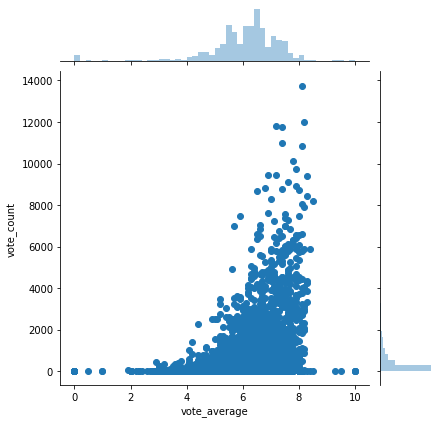

In [4]:
 sns.jointplot(x="vote_average", y="vote_count", data=df)

In [5]:
c=df["vote_count"]
s=df["vote_average"]
m=df["vote_average"].mean()
r=df["vote_count"].quantile(0.70)
df["weighted_avg"]=(s*c+m*r)/(c+r)
df=df.sort_values("weighted_avg",ascending=False)
df

,id,title,vote_average,vote_count,weighted_avg
1881,278,The Shawshank Redemption,8.5,8205,8.340775
3337,238,The Godfather,8.4,5893,8.192887
662,550,Fight Club,8.3,9413,8.171648
3232,680,Pulp Fiction,8.3,8428,8.157615
65,155,The Dark Knight,8.2,12002,8.102674
...,...,...,...,...,...
303,314,Catwoman,4.2,808,4.991470
3746,241251,The Boy Next Door,4.1,1022,4.822053
210,415,Batman & Robin,4.2,1418,4.749951
242,166424,Fantastic Four,4.4,2278,4.743880


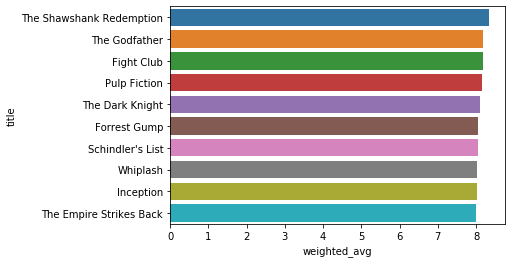

In [6]:
sns.barplot(df["weighted_avg"].head(10),df["title"].head(10))

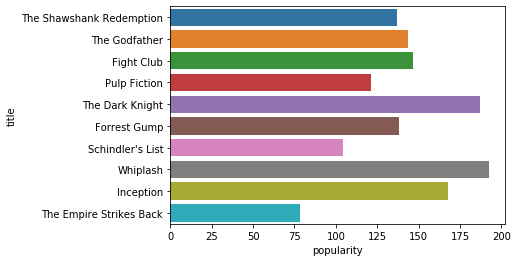

In [7]:
df["popularity"]=a
sns.barplot(df["popularity"].head(10),df["title"].head(10))

In [12]:
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler()
df[["popularity","weighted_avg"]]=scl.fit_transform(df[["popularity","weighted_avg"]])
df["recomendation"]=(df["popularity"]+df["weighted_avg"])/2
df = df.sort_values(['recomendation'], ascending=False)
df

,id,title,vote_average,vote_count,weighted_avg,popularity,recomendation
95,157336,Interstellar,8.1,10867,0.906439,0.827162,0.866801
546,211672,Minions,6.4,4571,0.460630,1.000000,0.730315
94,118340,Guardians of the Galaxy,7.9,9742,0.851874,0.549462,0.700668
788,293660,Deadpool,7.4,10995,0.725217,0.587690,0.656453
127,76341,Mad Max: Fury Road,7.2,9427,0.670973,0.495989,0.583481
...,...,...,...,...,...,...,...
2122,9760,Epic Movie,3.2,326,0.102239,0.006926,0.054583
210,415,Batman & Robin,4.2,1418,0.019593,0.057189,0.038391
3746,241251,The Boy Next Door,4.1,1022,0.039279,0.027595,0.033437
242,166424,Fantastic Four,4.4,2278,0.017935,0.043544,0.030740


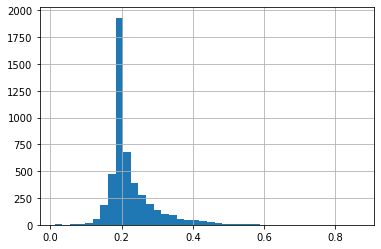

In [14]:
df["recomendation"].hist(bins=40)